In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import unicodedata
import json
from tensorflow.keras.utils import to_categorical

In [2]:
RAW_DATA_DIR = '/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/raw'   # raw dataset folder
MAPPING_DIR  = '/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings'
OUTPUT_DIR   = '/Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/outputs/processed/IT24102032/'

os.makedirs(MAPPING_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

UNICODE_MAPPING_FILE = os.path.join(MAPPING_DIR, 'unicode_mapping.json')
FOLDER_MAPPING_FILE  = os.path.join(MAPPING_DIR, 'folder_to_class.json')

train_path = os.path.join(RAW_DATA_DIR, 'train')
valid_path = os.path.join(RAW_DATA_DIR, 'valid')
test_path  = os.path.join(RAW_DATA_DIR, 'test')

In [3]:
IMG_HEIGHT = 80
IMG_WIDTH  = 80

In [4]:
sinhala_classes=["අ","ආ","ඇ","ඈ","ඉ","ඊ","උ","එ","ඒ","ඔ","ඕ",
             "ක","කා","කැ","කෑ","කි","කී","කු","කූ","ක්","කෝ","ක්‍ර","ක්‍රි","ක්‍රී",
             "ග","ගා","ගැ","ගෑ","ගි","ගී","ගු","ගූ","ග්","ගෝ","ග්‍ර","ග්‍රි","ග්‍රී",
             "ච","චා","චැ","චෑ","චි","චී","චු","චූ","ච්","චෝ","ච්‍ර","ච්‍ර්","ච්‍රී",
             "ජ","ජා","ජැ","ජෑ","ජි","ජී","ජු","ජූ","ජ්","ජෝ","ජ්‍ර","ජ්‍රි","ජ්‍රී",
             "ට","ටා","ටැ","ටෑ","ටි","ටී","ටු","ටූ","ට්","ටෝ","ට්‍ර","ට්‍ර්","ට්‍රි"
             ,"ඩ","ඩා","ඩැ","ඩෑ","ඩි","ඩී","ඩු","ඩූ","ඩ්","ඩෝ","ඩ්‍ර","ඩ්‍ර්","ඩ්‍රි",
             "ණ","ණා","ණි",
             "ත","තා","ති","තී","තු","තූ","ත්","තෝ","ත්‍ර","ත්‍රා","ත්‍රි","ත්‍රී",
             "ද ","දා","දැ","දෑ","දි","දී","දු","දූ","ද්","දෝ","ද්‍ර","ද්‍රෝ","ද්‍රා","ද්‍රි","ද්‍රී",
             "න","නා","නැ","නෑ","නි","නී","නු","නූ","න්","නෝ","න්‍ර","න්‍රා","න්‍රි","න්‍රී",
             "ප","පා","පැ","පෑ","පි","පී","පු","පූ","ප්","ප්‍රෝ","පෝ","ප්‍ර","ප්‍රා","ප්‍රි","ප්‍රී",
             "බ","බා","බැ","බෑ","බි","බී","බු","බූ","බ්","බ්‍රෝ","බ්‍ර","බ්‍රා","බ්‍රි","බ්‍රී","බ්‍රෝ",
             "ම","මා","මැ","මෑ","මි","මී","මු","මූ","ම්","මෝ","ම්‍ර","ම්‍රා","ම්‍රි","ම්‍රී","ම්‍රෝ",
             "ය","යා","යැ","යෑ","යි","යී","යු","යූ","ෝ","ය්","hda",
             "ර","රා","රැ","රැ","රු","රූ","රි","රී",
             "ල","ලා","ලැ","ලෑ","ලි","ලී","ලු","ලූ","ල්",",da",
             "ව","වා","වැ","වෑ","වි","වී","වු","වූ","ව්","jda","ව්‍ර","ව්‍රා","ව්‍රැ","ව්‍රෑ","j%da",
             "ශ","ශා","ශැ","ශෑ","ශි","ශී","ශු","ශූ","ශ්","Yda","ශ්‍ර","ශ්‍රා","ශ්‍රැ","ශ්‍රෑ","ශ්‍රි","ශ්‍රී","Y%da",
             "ෂ","ෂා","ෂැ","ෂෑ","ෂි","ෂී","ෂු","ෂූ","ෂ්","Ida",
             "ස","සා","සැ","සෑ","සි","සී","සු","සූ","ida","ස්‍ර","ස්‍රා","ස්‍රි","ස්‍රී","ස්",
             "හ","හා","හැ","හෑ","හි","හී","හු","හූ","හ්","yda",
             "ළ","ළා","ළැ","ළෑ","ළි","ළී",
             "ළූ","ළූ",
             "ෆ","ෆා","ෆැ","ෆෑ","ෆි","ෆී","ෆූ","ෆූ","ෆ්‍ර","ෆ්‍රි","ෆ්‍රී","ෆ්‍රැ","ෆ්‍රෑ","ෆ්","*da",
             "ක්‍රා","ක්‍රැ","ක්‍රෑ","l%da",".%da",
             "ඛ","ඛා","ඛි","ඛී","ඛ්",
             "ඝ","ඝා","ඝැ","ඝෑ","ඝි","ඝී","ඝු","ඝූ",">da","ඝ්","ඝ්‍ර","ඝ්‍රා","ඝ්‍රි","ඝ්‍රී",
             "ඳ","ඳා","ඳැ","ෑ","ඳෑ","ඳි","ඳී","ඳු","ඳූ","|da "," ඳ්",
             "ඟ","ඟා","ඟැ"," ඟෑ"," ඟි","ඟී"," ඟු"," ඟූ","Õda","ඟ්",
             "ඬ","ැ","ඬා"," ඬැ", "ඬෑ"," ඬි","ඬී"," ඬු","ඬූ","ඬda "," ඬ්",
             "ඹ","ඹා"," ඹැ"," ඹෑ"," ඹි","ඹී"," ඹු","ඹූ","Uda","ඹ්",
             "භ","භා","භැ","භෑ","භි","භී","භු","භූ","Nda","භ්",
             "ධ","ධා","ධැ","ධෑ",",ධි",",ධී",",ධු",",ධූ","ධෝ","ධ්",
            "ඨ","ඨා","ඨැ","ඨි","ඨී","ඨු","ඨූ","ඨ්","ඪ","ඪා","ඪි","Vda",
             "ඵ","ඵා","ඵු","ඵි","Mda","ඵ් ","ථ","ථා","ථැ","ථ්","ා","ෟ","ණැ","ණෑ","ෘ","ණී","ණු","ණූ",
            "Kda","ණ්","ඥ","ඥා","{da","ඤ","ඤා","ඤු","[da","ඤ්","ඣ","ඣා","ඣු","COda",
             "ඣ්","ඦ","ඦා","ඦැ","ඦෑ","ඦි","ඦු","ඦූ","ඦෝ",
             "ඦ්","ඡ","ඡා","ඡැ","ඡෑ","ඡි","ඡේ","තැ","තෑ","ත්‍රැ","ත්‍රෑ",";%da",
             "ළු","ෲ","HQ","ff","f","H","Hq"

]

In [8]:
def generate_unicode_mapping(classes):
    mapping = {"index_to_char": {}, "char_to_index": {}}
    for idx, char in enumerate(classes):  # 0-based indexing
        entry = {
            "character": char,
            "unicode_points": [f"U+{ord(c):04X}" for c in char],
            "unicode_names": [unicodedata.name(c, "UNKNOWN") for c in char],
            "codepoints": [ord(c) for c in char],
            "utf8_bytes": char.encode("utf-8").hex(),
            "is_sinhala": True
        }
        mapping["index_to_char"][str(idx)] = entry
        mapping["char_to_index"][char] = idx
    return mapping

# Save Unicode mapping
unicode_mapping = generate_unicode_mapping(sinhala_classes)
with open(UNICODE_MAPPING_FILE, "w", encoding="utf-8") as f:
    json.dump(unicode_mapping, f, ensure_ascii=False, indent=4)
print(f"✅ Unicode mapping saved to {UNICODE_MAPPING_FILE}")

# Load mapping
with open(UNICODE_MAPPING_FILE, "r", encoding="utf-8") as f:
    loaded_mapping = json.load(f)
index_to_char = loaded_mapping["index_to_char"]
char_to_index = loaded_mapping["char_to_index"]

✅ Unicode mapping saved to /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings/unicode_mapping.json


In [9]:
def preprocess_dataset(dataset_path, classes, img_height=IMG_HEIGHT, img_width=IMG_WIDTH):
    """
    dataset_path : str : path to dataset (train/valid/test)
    classes      : list: ordered Sinhala characters (0-based)
    """
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"Dataset path not found: {dataset_path}")

    X, y = [], []
    folder_mapping = {}
    folders = sorted(os.listdir(dataset_path))

    for folder in folders:
        folder_path = os.path.join(dataset_path, folder)
        if not os.path.isdir(folder_path):
            continue

        cls_index = None
        cls_char  = None

        # Convert 1-based folder names to 0-based indices
        if folder.isdigit():
            folder_num = int(folder)
            if 1 <= folder_num <= len(classes):
                cls_index = folder_num - 1  # 0-based
                cls_char  = classes[cls_index]
            else:
                print(f"⚠️ Folder {folder_num} outside class range, skipping")
                continue
        elif folder in char_to_index:  # fallback if folder named as character
            cls_index = char_to_index[folder]
            cls_char  = folder
        else:
            print(f"⚠️ Skipping folder '{folder}' (cannot map to index)")
            continue

        folder_mapping[folder] = {"character": cls_char, "index": cls_index}

        # Process images
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"⚠️ Could not read image: {img_path}")
                continue

            img = cv2.equalizeHist(img)                    # Histogram Equalization
            img = cv2.resize(img, (img_width, img_height)) # Resize
            img = img / 255.0                              # Normalize to 0-1

            X.append(img)
            y.append(cls_index)

    X = np.array(X).reshape(-1, img_height, img_width, 1)
    y = to_categorical(np.array(y), num_classes=len(classes))  # 0-based
    return X, y, folder_mapping

In [10]:
X_train, y_train, train_folder_map = preprocess_dataset(train_path, sinhala_classes)
X_valid, y_valid, valid_folder_map = preprocess_dataset(valid_path, sinhala_classes)
X_test,  y_test,  test_folder_map  = preprocess_dataset(test_path,  sinhala_classes)

In [11]:
all_folder_mapping = {
    "train": train_folder_map,
    "valid": valid_folder_map,
    "test":  test_folder_map
}
with open(FOLDER_MAPPING_FILE, "w", encoding="utf-8") as f:
    json.dump(all_folder_mapping, f, ensure_ascii=False, indent=4)
print(f"✅ Folder-to-class mapping saved to {FOLDER_MAPPING_FILE}")

✅ Folder-to-class mapping saved to /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/data/mappings/folder_to_class.json


In [12]:
np.save(os.path.join(OUTPUT_DIR, 'X_train.npy'), X_train)
np.save(os.path.join(OUTPUT_DIR, 'y_train.npy'), y_train)
np.save(os.path.join(OUTPUT_DIR, 'X_valid.npy'), X_valid)
np.save(os.path.join(OUTPUT_DIR, 'y_valid.npy'), y_valid)
np.save(os.path.join(OUTPUT_DIR, 'X_test.npy'),  X_test)
np.save(os.path.join(OUTPUT_DIR, 'y_test.npy'),  y_test)
print(f"✅ Processed datasets saved to {OUTPUT_DIR}")

✅ Processed datasets saved to /Users/dev/PycharmProjects/Sinhala_Handwriting_Project/results/outputs/processed/IT24102032/


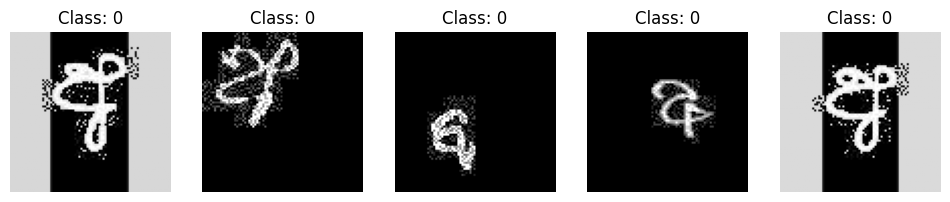

In [13]:
plt.figure(figsize=(12,4))
for i in range(min(5, len(X_train))):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i].reshape(IMG_HEIGHT, IMG_WIDTH), cmap='gray')
    plt.title(f'Class: {np.argmax(y_train[i])}')
    plt.axis('off')
plt.show()